<a href="https://colab.research.google.com/github/rabkAkbar/Postest2-DataMining/blob/main/B1_2109116046_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np

In [34]:
df = pd.read_csv('dataset_market_basket.csv')
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from itertools import permutations
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [36]:
new_rule = []
for rule in rules:
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    new_rule.append(rule)
new_rule

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('salty snack', 'root vegetables'),
 ('salty snack', 'detergent'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hy

In [37]:
hitung = {} 
for rule in new_rule:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

In [38]:
supp = [i/len(df)*100 for i in hitung.values()]
print(supp)
for item,support in hitung.items():
  print(f"{item} support = {round(support/len(df)*100)}%")

[5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.26315

In [39]:
for item,ab in hitung.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]} Confidence = {ab/df[i[0]].sum()*100}%") 

whole milk->pasrty Confidence = 20.0%
whole milk->salty snack Confidence = 20.0%
whole milk->sausage Confidence = 40.0%
whole milk->semi-finished bread Confidence = 20.0%
whole milk->yogurt Confidence = 20.0%
whole milk->soda Confidence = 20.0%
whole milk->rolls/buns Confidence = 20.0%
whole milk->butter Confidence = 20.0%
pasrty->whole milk Confidence = 100.0%
pasrty->salty snack Confidence = 100.0%
salty snack->whole milk Confidence = 50.0%
salty snack->pasrty Confidence = 50.0%
salty snack->root vegetables Confidence = 50.0%
salty snack->detergent Confidence = 50.0%
sausage->whole milk Confidence = 50.0%
sausage->semi-finished bread Confidence = 25.0%
sausage->yogurt Confidence = 25.0%
sausage->hygiene articles Confidence = 25.0%
sausage->rolls/buns Confidence = 50.0%
semi-finished bread->whole milk Confidence = 100.0%
semi-finished bread->sausage Confidence = 100.0%
semi-finished bread->yogurt Confidence = 100.0%
yogurt->whole milk Confidence = 100.0%
yogurt->sausage Confidence = 1

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

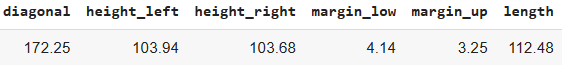
<!-- 1412 -->

In [40]:
import math

In [41]:
df2 = pd.read_csv("deteksi_uang_palsu.csv")
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [42]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi
# Menentukan nilai referensi untuk setiap atribut
ref_values = {'diagonal': 172.25, 
              'height_left': 103.94, 
              'height_right': 103.68, 
              'margin_low': 4.14, 
              'margin_up': 3.25, 
              'length': 112.48}

# Menghitung jarak Euclidean untuk setiap baris pada dataset
distances = []
for index, row in df2.iterrows():
    dist = 0
    for attr, ref_value in ref_values.items():
        dist += (row[attr] - ref_value) ** 2
    distances.append(math.sqrt(dist))

# Menambahkan kolom 'distance' ke dalam dataset
df2['distance'] = distances

# Menampilkan hasil perhitungan jarak Euclidean
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,distance
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
1,True,171.66,103.68,103.41,4.35,3.33,113.74,1.458321
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934
4,True,171.79,104.57,104.04,4.26,3.15,113.46,1.312593
5,False,172.00,104.23,104.52,5.76,3.37,110.94,2.421281
6,False,171.56,104.03,103.93,5.47,3.50,111.67,1.741896
7,False,171.90,104.33,104.40,4.70,3.31,112.12,1.113463
8,False,171.84,104.06,104.10,4.87,3.25,111.04,1.722034
9,False,172.11,104.14,104.15,4.84,3.28,110.98,1.738217


In [43]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
# Menentukan nilai K
K = int(math.sqrt(len(df2)))

In [44]:
# Mengurutkan dataset berdasarkan kolom 'distance'
sorted_df2 = df2.sort_values(by=['distance'])

In [45]:
K_dekat = sorted_df2.head(K)
K_dekat

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,distance
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934


In [46]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak
count_class = {}
for index, row in K_dekat.iterrows():
    if row['is_genuine'] not in count_class:
        count_class[row['is_genuine']] = 1
    else:
        count_class[row['is_genuine']] += 1
prediksi = max(count_class, key=count_class.get)

In [47]:
#menampilkan hasil prediksi
print('Hasil prediksi: ', prediksi)

Hasil prediksi:  True


# (3) Analisis

> Nama : Muhammad Akbar Gulunna

> Nim : 2109116046


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# BUSINESS UNDERSTANDING

Business Understanding dari dataset ini adalah untuk membantu dokter dalam memprediksi kemungkinan pasien mengalami gagal jantung. Hal ini dapat membantu dokter dalam memberikan perawatan yang tepat dan merencanakan pengobatan yang efektif untuk pasien.

Dengan menggunakan dataset ini, dokter dapat mengidentifikasi faktor-faktor yang berkontribusi pada risiko gagal jantung dan mengembangkan strategi pencegahan yang tepat. Selain itu, pihak rumah sakit dapat menggunakan dataset ini untuk mengoptimalkan penggunaan sumber daya dan meningkatkan efisiensi perawatan pasien dengan gagal jantung.

# DATA UNDERSTANDING

In [48]:
df3 = pd.read_csv("heart.csv")
df3

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [49]:
#menampilkan informasi dari dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [50]:
df3.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [51]:
#menampilkan semua kolom pada dataset
df3.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [52]:
#melihat nilai kosong pada kolom df3
df3.isna()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
#melihat nilai unik pada tiap kolom di database
for col in df3.columns:
    print(col, ":", len(df3[col].unique()), "nilai unik")

Age : 50 nilai unik
Sex : 2 nilai unik
ChestPainType : 4 nilai unik
RestingBP : 67 nilai unik
Cholesterol : 222 nilai unik
FastingBS : 2 nilai unik
RestingECG : 3 nilai unik
MaxHR : 119 nilai unik
ExerciseAngina : 2 nilai unik
Oldpeak : 53 nilai unik
ST_Slope : 3 nilai unik
HeartDisease : 2 nilai unik


# DATA PREPARATION

In [53]:
df3.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [57]:
#liat data duplicate
df3.duplicated().sum()

0

In [62]:
# Mengubah tipe data kolom tertentu menjadi numerik
df3['Age'] = pd.to_numeric(df3['Age'], errors='coerce')
df3['RestingBP'] = pd.to_numeric(df3['RestingBP'], errors='coerce')
df3['Cholesterol'] = pd.to_numeric(df3['Cholesterol'], errors='coerce')
df3['MaxHR'] = pd.to_numeric(df3['MaxHR'], errors='coerce')
df3['Oldpeak'] = pd.to_numeric(df3['Oldpeak'], errors='coerce')
df3['HeartDisease'] = pd.to_numeric(df3['HeartDisease'], errors='coerce')

In [63]:
# Mengubah tipe data kolom tertentu menjadi kategorikal
df3['Sex'] = df3['Sex'].astype('category')
df3['ChestPainType'] = df3['ChestPainType'].astype('category')
df3['FastingBS'] = df3['FastingBS'].astype('category')
df3['RestingECG'] = df3['RestingECG'].astype('category')
df3['ExerciseAngina'] = df3['ExerciseAngina'].astype('category')
df3['ST_Slope'] = df3['ST_Slope'].astype('category')

In [64]:
df3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
